# Importing Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo,list_available_datasets 
# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# Listing the available datasets in UCI repository

In [12]:
# Available UCI repositories 
list_available_datasets()

-------------------------------------
The following datasets are available:
-------------------------------------
Dataset Name                                                                            ID    
------------                                                                            --    
Abalone                                                                                 1     
Adult                                                                                   2     
Annealing                                                                               3     
Audiology (Standardized)                                                                8     
Auto MPG                                                                                9     
Automobile                                                                              10    
Balance Scale                                                                           12    
Balloons                       

# Importing Dataset

In [25]:
# Fetch the adult dataset from UCI repository 
adultdataset=fetch_ucirepo(id=2)

# Creating dataframe with feature columns and target columns
x=pd.DataFrame(adultdataset.data.features)
y=pd.DataFrame(adultdataset.data.targets,columns=['income'])
df=pd.concat([x,y],axis=1)
df.to_excel("adultdata.xlsx",index=False)
# Show the first few rows
df.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

# Initial Exploration

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [16]:
df.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [27]:
df.describe()

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  48842.000000  4.884200e+04   48842.000000  48842.000000  48842.000000   
mean      38.643585  1.896641e+05      10.078089   1079.067626     87.502314   
std       13.710510  1.056040e+05       2.570973   7452.019058    403.004552   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175505e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.781445e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.376420e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    48842.000000  
mean        40.422382  
std         12.391444  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

# Identifying the columns with '?'

In [28]:
# Identify columns with "?" values
print((df == '?').sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64


# Replacing the '?' value with the most frequent value

In [30]:
# Loop through each column in the dataframe
for column in df.columns:
    # Find the most frequent value (mode) in the column excluding '?'
    most_frequent_value = df[df[column] != '?'][column].mode()[0]
    
    # Replace '?' with the most frequent value
    df[column] = df[column].replace('?', most_frequent_value)
df.to_excel("adultdataset.xlsx",index=False)
# Display the updated dataframe
print(df.head())


   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

In [31]:
print((df == '?').sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


# Cleaning Income column

In [34]:
# Example:'income' column has values like <=50k, <=50k., >50k, >50k.
# Replace '.' with an empty string to clean the column
df['income'] = df['income'].str.replace('.', '', regex=False)

# Verify that the values are consistent now
print(df['income'].value_counts())
df.to_excel("adultdataset.xlsx",index=False)

income
<=50K    37155
>50K     11687
Name: count, dtype: int64


In [33]:
df.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

In [95]:
df['education'].unique()

array(['Bachelors', 'Highschool', 'Masters', 'Some-college',
       'Assocschool', 'Middleschool', 'Doctorate', 'Prof-school',
       'Preschool'], dtype=object)

In [94]:
df['education']=df['education'].replace(['1st-4th'],'Preschool')
df['education']=df['education'].replace(['5th-6th','7th-8th'],'Middleschool')
df['education']=df['education'].replace(['9th','10th','11th','12th','HS-grad'],'Highschool')
df['education']=df['education'].replace(['Assoc-acdm','Assoc-voc'],'Assocschool')

In [99]:
df['marital-status'].unique()

array(['Never-married', 'Married', 'Divorced', 'Separated', 'Widowed'],
      dtype=object)

In [98]:
df['marital-status']=df['marital-status'].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'],'Married')


In [101]:
df['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv', nan], dtype=object)

In [104]:
df['occupation'] = df['occupation'].replace(['Machine-op-inspct','Tech-support'],'Technical-service')  
df['occupation'] = df['occupation'].replace(['Handlers-cleaners','Priv-house-serv'],'Cleaning-service')
df['occupation'] = df['occupation'].replace(['Craft-repair','Farming-fishing',],'Farming')
df['occupation'] = df['occupation'].replace(['Adm-clerical','Exec-managerial'],'Administration-service')

df['occupation'] = df['occupation'].replace(['Protective-serv','Armed-Forces'],'Security-service')
df['occupation'].unique()

array(['Administration-service', 'Cleaning-service', 'Prof-specialty',
       'Other-service', 'Sales', 'Farming', 'Transport-moving',
       'Technical-service', 'Security-service', nan], dtype=object)

# Univariate Analysis

## 1)Age

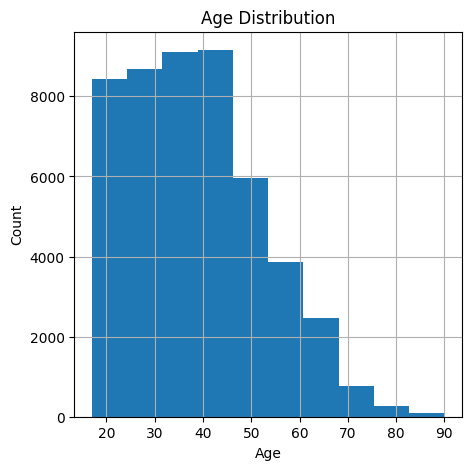

In [46]:
df['age'].hist(figsize=(5,5))
plt.title("Age Distribution")
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### This histogram shows the age ranges between 17-90

# 2)workclass

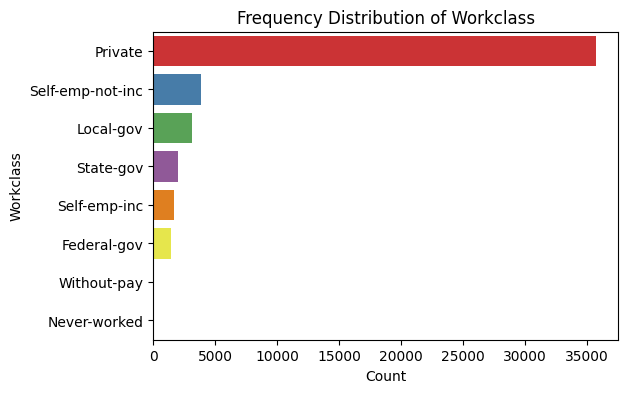

In [52]:
plt.figure(figsize=(6, 4))
sns.barplot(x=df['workclass'].value_counts().values, y=df['workclass'].value_counts().index,palette='Set1')
plt.title('Frequency Distribution of Workclass')
plt.xlabel('Count')
plt.ylabel('Workclass')
plt.show()

### Here we can see more people in private sector

## 3)fnlwgt

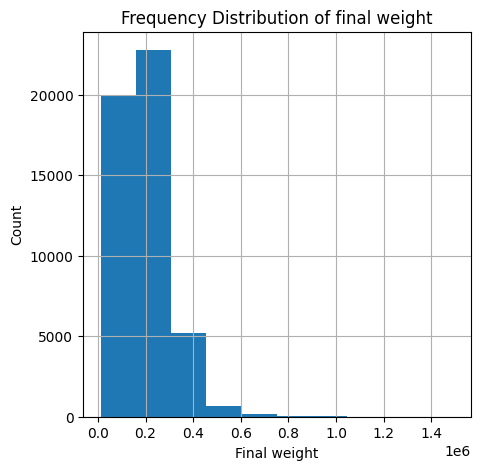

In [47]:
df['fnlwgt'].hist(figsize=(5,5))
plt.title('Frequency Distribution of final weight')
plt.xlabel('Final weight')
plt.ylabel('Count')
plt.show()

### This histogram shows how the final weights were distributed

## 4)education

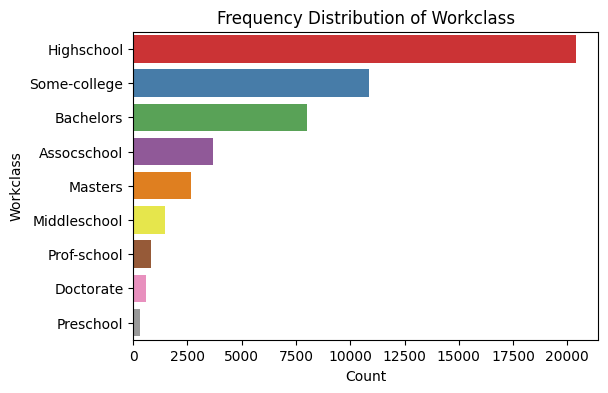

In [96]:
plt.figure(figsize=(6, 4))
sns.barplot(x=df['education'].value_counts().values, y=df['education'].value_counts().index,palette='Set1')
plt.title('Frequency Distribution of Workclass')
plt.xlabel('Count')
plt.ylabel('Workclass')
plt.show()

## 5)marital-status

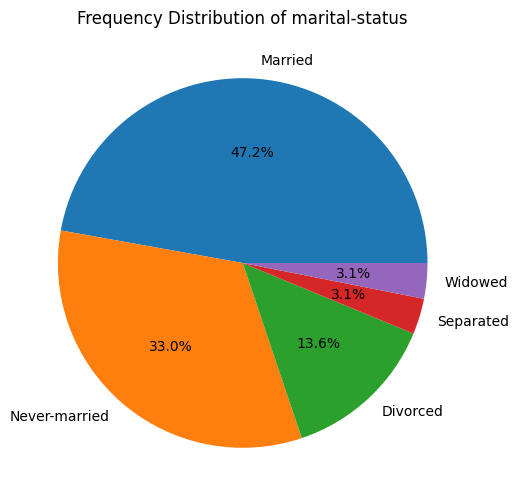

In [100]:
plt.figure(figsize=(10, 6))
marital_counts=df['marital-status'].value_counts()
plt.pie(marital_counts.values,labels=marital_counts.index,autopct='%1.1f%%')
plt.title('Frequency Distribution of marital-status')
plt.show()

### marital-status has 7 categories
### Married has highest percentage as 47.2 and widowed and separated has least percentage.

## 6)occupation

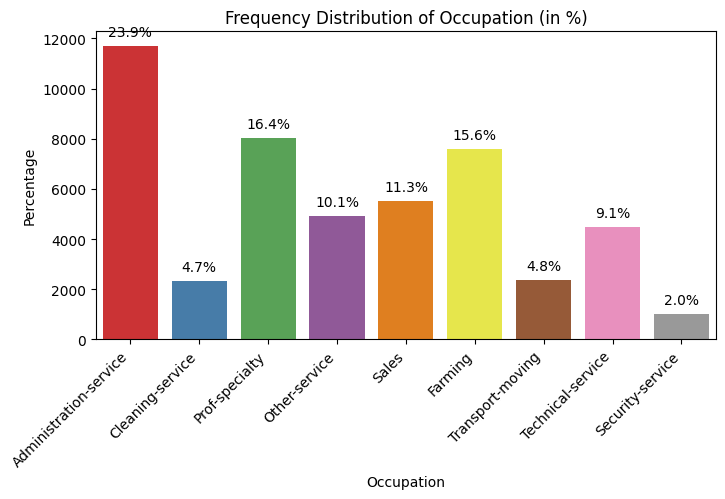

In [105]:
# Calculate the total number of entries
total = len(df['occupation'])

# Plot the bar chart for occupation
plt.figure(figsize=(8, 4))
x = sns.countplot(x="occupation", data=df, palette='Set1')

# Annotate the percentages on each bar
for p in x.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Customize the plot
plt.title('Frequency Distribution of Occupation (in %)')
plt.xlabel('Occupation')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')  
plt.show()


### Administration-service has the maximum count and Security-service has minimum samples in the occupation attribute.

## 7)relationship

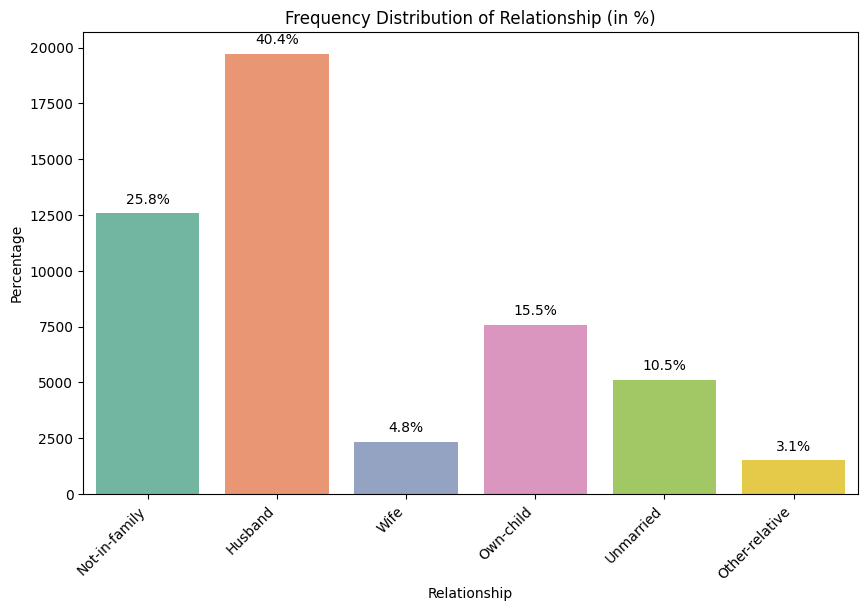

In [110]:
# Calculate the total number of entries
total = len(df['relationship'])


# Plot the bar chart for relationship
plt.figure(figsize=(10, 6))
x = sns.countplot(x="relationship", data=df, palette='Set2')

# Annotate the percentages on each bar
for p in x.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Customize the plot
plt.title('Frequency Distribution of Relationship (in %)')
plt.xlabel('Relationship')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')  
plt.show()

### Here Husband has maximum count and Wife has less count.

## 8)race

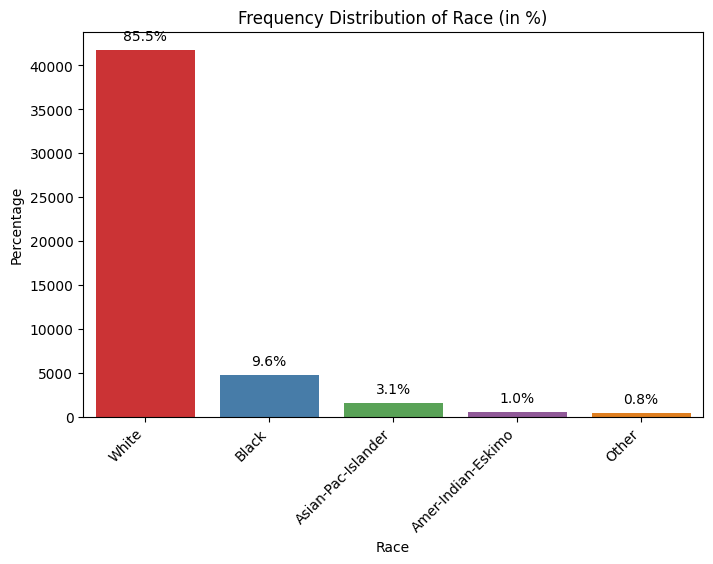

In [70]:
# Calculate the total number of entries
total = len(df['race'])

# Define custom colors (optional)
custom_colors = sns.color_palette('Set1')

# Plot the bar chart for race
plt.figure(figsize=(8, 5))
x = sns.countplot(x="race", data=df, palette=custom_colors)

# Annotate the percentages on each bar
for p in x.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Customize the plot
plt.title('Frequency Distribution of Race (in %)')
plt.xlabel('Race')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

### People under White race are high in percenatge and people in Other category are less.

## 9)sex

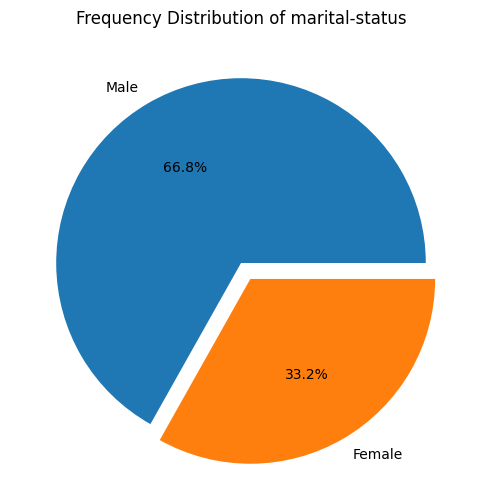

In [73]:
plt.figure(figsize=(10, 6))
sex_counts=df['sex'].value_counts()
explode=(0,0.1)
plt.pie(sex_counts.values,labels=sex_counts.index,explode=explode,autopct='%1.1f%%')
plt.title('Frequency Distribution of marital-status')
plt.show()

### This shows the male has high as 66.8%

## 10)capital-gain

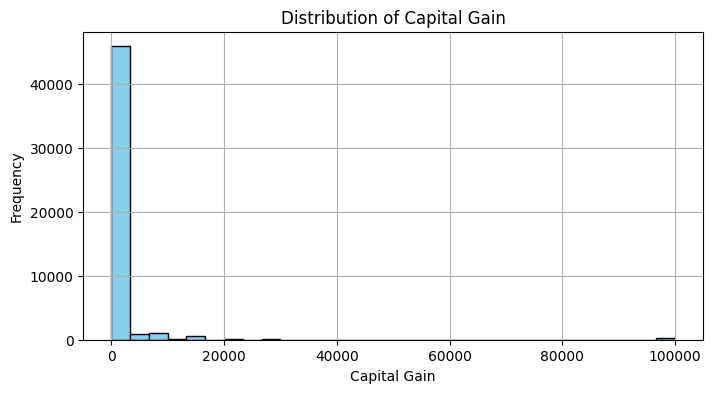

In [84]:
# Plotting the histogram for capital-gain
plt.figure(figsize=(8, 4))
plt.hist(df['capital-gain'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Capital Gain')
plt.xlabel('Capital Gain')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### This histogram shows that most of the "capital-gain" values are centered on 0 and few on 10k and 90k.

## 11)capital-loss

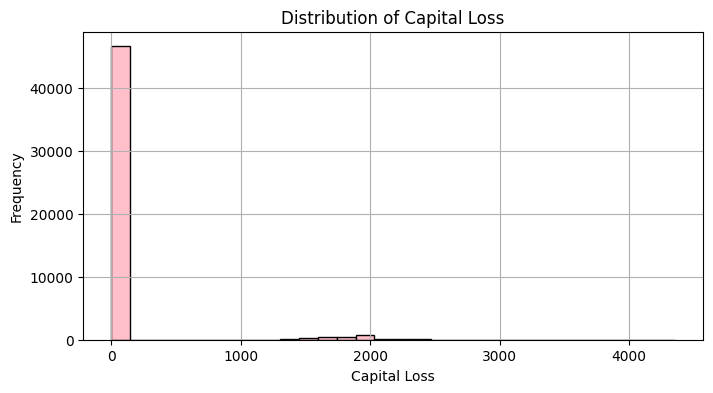

In [85]:
# Plotting the histogram for capital-loss
plt.figure(figsize=(8, 4))
plt.hist(df['capital-loss'].dropna(), bins=30, color='pink', edgecolor='black')
plt.title('Distribution of Capital Loss')
plt.xlabel('Capital Loss')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### This attribute is similar to the capital-gain i.e. most of the values are centered on 0(nearly 48000 of them)

## 12)hours-per-week

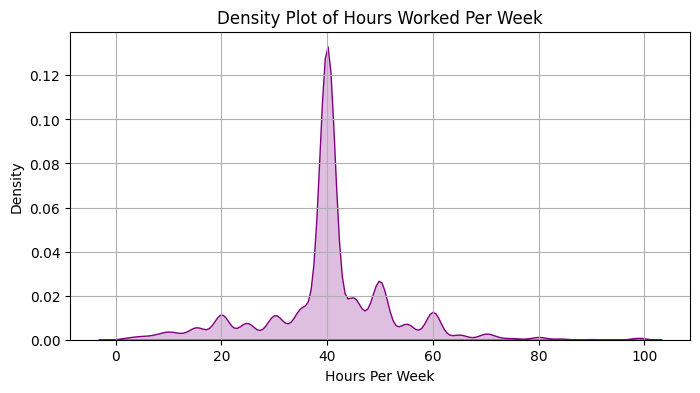

In [86]:
# Plotting the density plot for hours-per-week
plt.figure(figsize=(8, 4))
sns.kdeplot(df['hours-per-week'].dropna(), shade=True, color='purple')
plt.title('Density Plot of Hours Worked Per Week')
plt.xlabel('Hours Per Week')
plt.ylabel('Density')
plt.grid(True)
plt.show()


### Most people work 40 hours per week

## 13)native-country

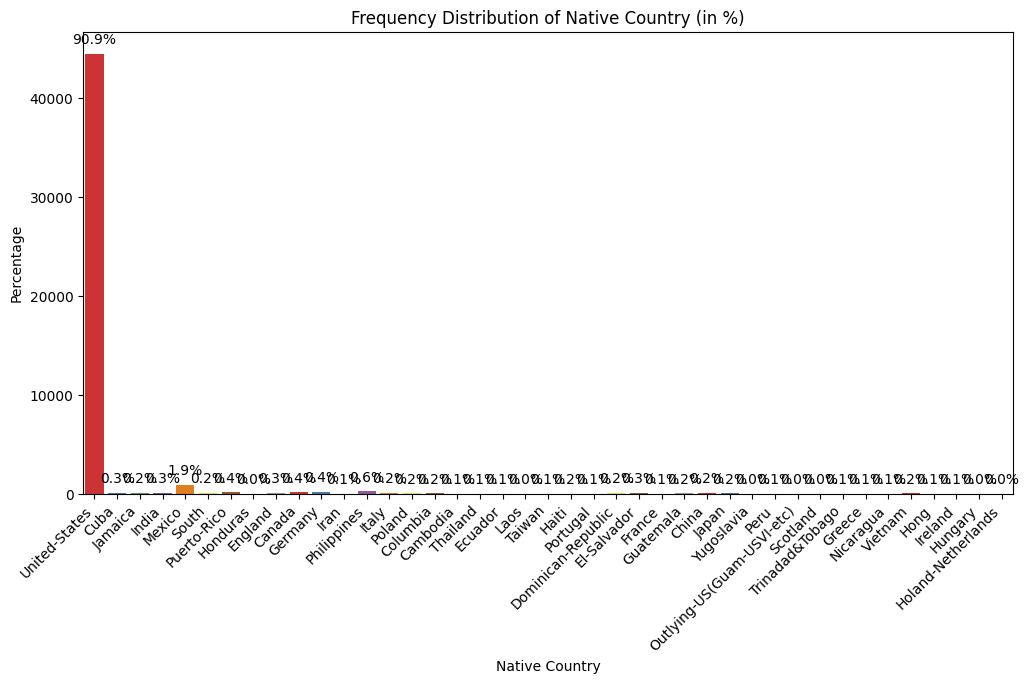

In [89]:
# Calculate the total number of entries
total = len(df['native-country'])

# Define custom colors (optional)
custom_colors = sns.color_palette('Set1')

# Plot the bar chart for native-country
plt.figure(figsize=(12, 6))
x = sns.countplot(x="native-country", data=df, palette=custom_colors)

# Annotate the percentages on each bar
for p in x.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Customize the plot
plt.title('Frequency Distribution of Native Country (in %)')
plt.xlabel('Native Country')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

### Most people are in United-States

## 14)income

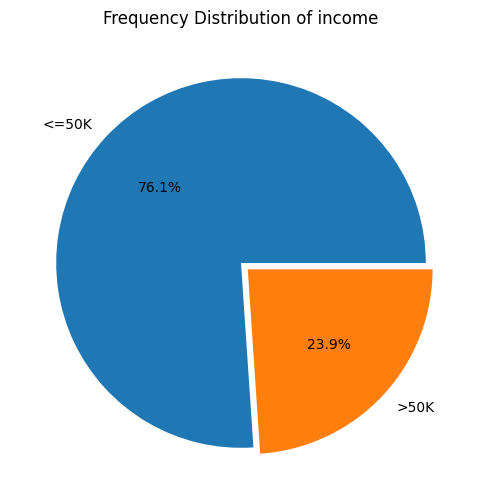

In [109]:
plt.figure(figsize=(10, 6))
income_counts=df['income'].value_counts()
explode=(0,0.05)
plt.pie(income_counts.values,labels=income_counts.index,explode=explode,autopct='%1.1f%%')
plt.title('Frequency Distribution of income')
plt.show()

### Most people income is in <=50K category.

# Bivariate Analysis

## 1)Age vs Income

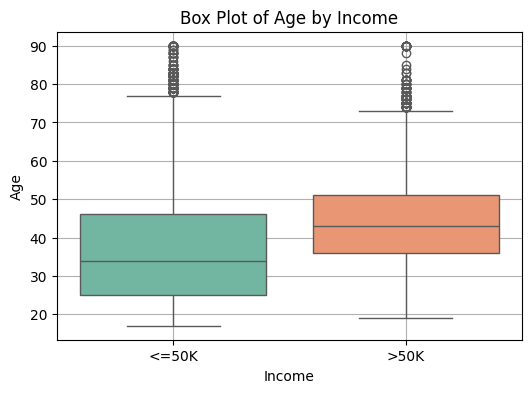

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot of age vs income
plt.figure(figsize=(6, 4))
sns.boxplot(x='income', y='age', data=df, palette='Set2')

# Customize the plot
plt.title('Box Plot of Age by Income')
plt.xlabel('Income')
plt.ylabel('Age')
plt.grid(True)
plt.show()



### The median age (middle line in the box) for the <=50K group appears to be around 35-40 years old.
### For the >50K group, the median age is higher, around 45-50 years old. This suggests that people earning more than 50K tend to be older on average.
### It suggesting that most people who earn more than 50K are older.
### This plot indicates that age and income may have a positive correlation.

## 2)hours_per_week vs Income

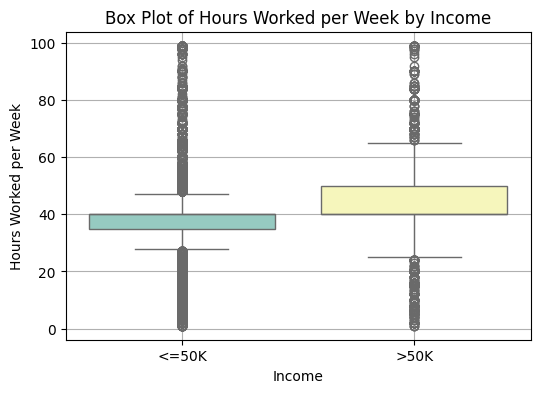

In [113]:
# Create a box plot of hours-per-week vs income
plt.figure(figsize=(6, 4))
sns.boxplot(x='income', y='hours-per-week', data=df, palette='Set3')

# Customize the plot
plt.title('Box Plot of Hours Worked per Week by Income')
plt.xlabel('Income')
plt.ylabel('Hours Worked per Week')
plt.grid(True)
plt.show()


### The median for individuals earning <=50K appears to be close to 40 hours per week.
### For individuals earning >50K, the median is also around 40-45 hours per week. However, the box extends higher, indicating that many people in the higher income bracket work more than 40 hours.
### This plot shows a positive association between working hours and income, as those working more hours are often in the >50K income¶

## 3) income and workclass

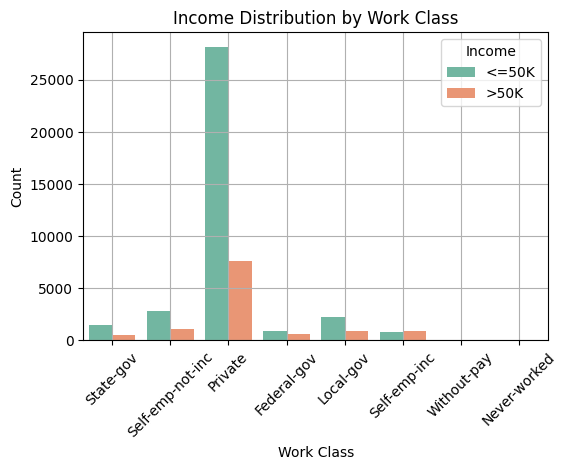

In [114]:
# Creating a grouped bar plot
plt.figure(figsize=(6, 4))
sns.countplot(x='workclass', hue='income', data=df, palette='Set2')

# Customizing the plot
plt.title('Income Distribution by Work Class')
plt.xlabel('Work Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Income')
plt.show()

### This chart provides overview of how income is distributed across various work classes, showing that the private sector dominates but is mostly composed of lower-income individuals.

## 4)income and education

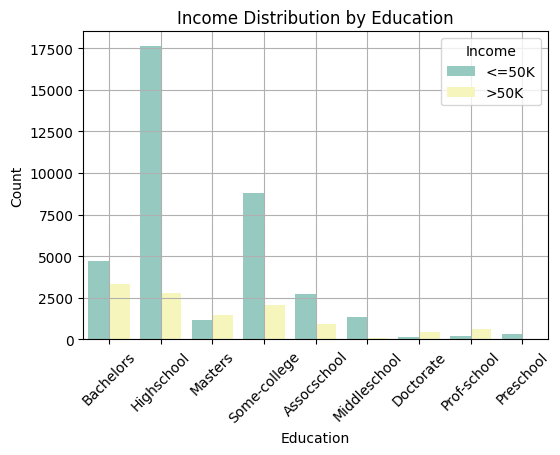

In [115]:
# Creating a grouped bar plot
plt.figure(figsize=(6, 4))
sns.countplot(x='education', hue='income', data=df, palette='Set3')

# Customizing the plot
plt.title('Income Distribution by Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Income')
plt.show()

### This chart provides overview of how income is distributed across various education levels, showing that the HS-grad degree dominates but is mostly composed of lower-income individuals.
### We can conclude that there is some dependency of the education on the target variable income.

## 5)income and marital-status

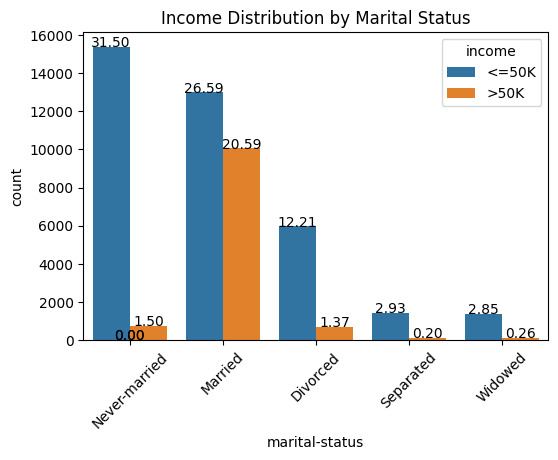

In [116]:
# Bar plot
plt.figure(figsize=(6, 4))
total = float(len(df))
ax=sns.countplot(x='marital-status', hue='income', data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.title('Income Distribution by Marital Status')
plt.xticks(rotation=45)
plt.show()

### Never-married has the highest percentage(31.50%) of falling under the income group (<=50k).
### Separated and Widowed has negligible contribution.
### We can conclude that there is some dependency of "marital-status" attribute on the target variable "income">50k

## 6)income and race

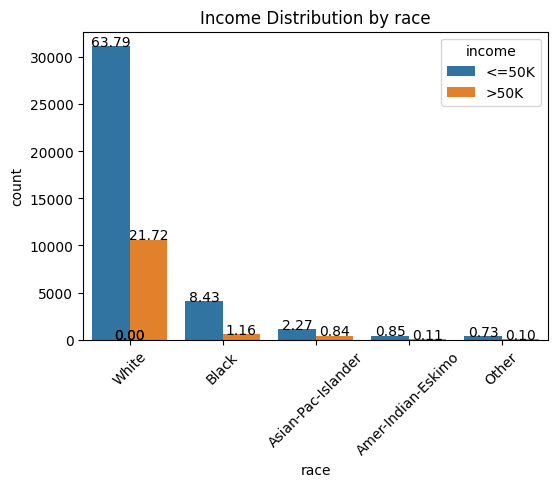

In [117]:
# Bar plot
plt.figure(figsize=(6, 4))
total = float(len(df))
ax=sns.countplot(x='race', hue='income', data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.title('Income Distribution by race')
plt.xticks(rotation=45)
plt.show()

### There is huge difference between the percentage of fall either groups for each "race" except for the "other"(.73%) and "amer-indian-eskimo"(.73%) but this could be due the lesser number of observations for those categories.
### We can conclude that there is no dependency of "race" attribute on the target variable "income"¶

# Multivariate Analysis

## For all numeric variables

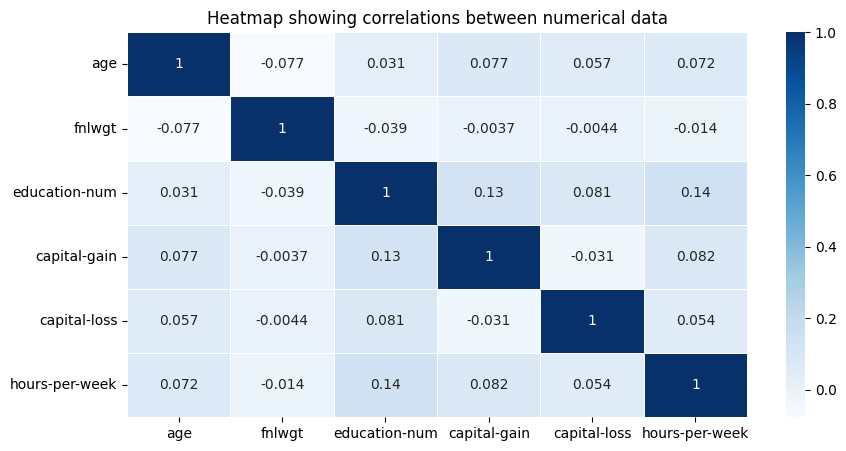

In [118]:
plt.figure(figsize=(10,5))
df_num = df.select_dtypes(include='number')
sns.heatmap(df_num.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

### There is neither strong positive nor strong negative correlation present in any variable .
### The strongest correlation is present between capital gain and hours-per-week, capital gain and age with Coefficient .077.(which is less than 0.1, it means that very small correlation among them).¶

## "income", "age", "sex"

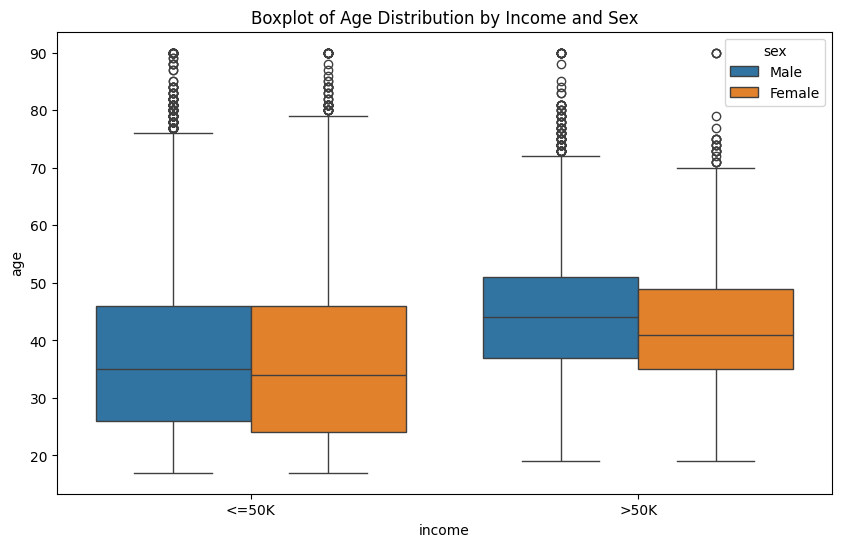

In [119]:
# Create a boxplot showing age distribution by sex and income
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='age', hue='sex', data=df)
plt.title('Boxplot of Age Distribution by Income and Sex')
plt.show()



### Older individuals (both males and females) are more likely to earn more than $50K, as indicated by the higher median ages in the >50K income group.
### Females seem to have a slightly narrower age range in both income categories compared to males.¶